<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Image-Classification-My-Final-Model-2022/blob/main/Fish_Image_Classification_Model_in_SVM_CNN_model(1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:

tf.__version__

'2.9.2'

In [43]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [117]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [45]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [46]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

#cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

In [47]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

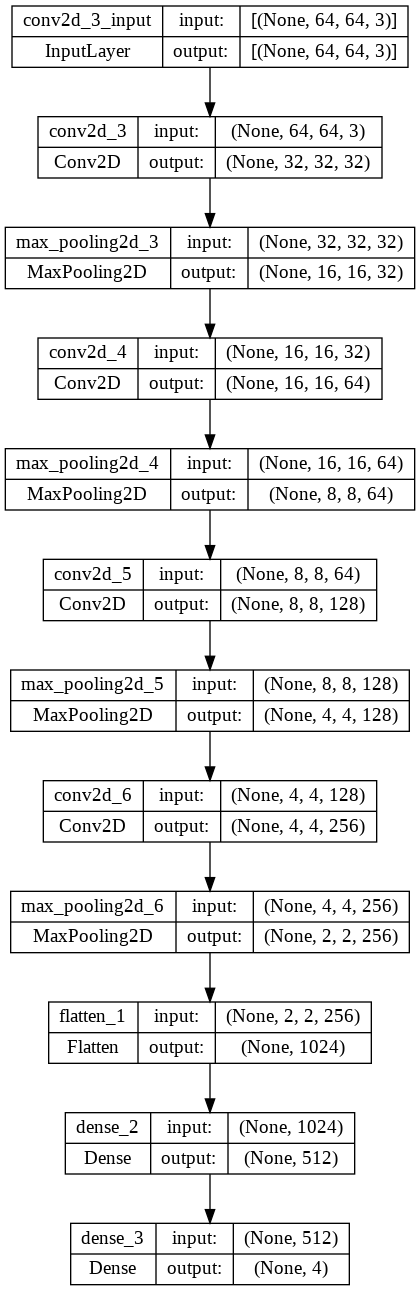

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn,show_shapes = True)

In [49]:

cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
#from tensorflow.keras.optimizers import Adam
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#cnn.compile(loss = 'squared_hinge',            
             # optimizer = opt,
             # metrics = ['accuracy'])

In [11]:
#from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
#import h5py

In [12]:
#erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
#mod_chk = ModelCheckpoint(
  #  filepath='/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part three(Final)/my_model_final.hdf5',
                       #   monitor = 'val_loss',save_best_only = True)
#lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [50]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50,
         # callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
          )

Epoch 1/50
150/150 [==============================] - 43s 277ms/step - loss: 1.1691 - accuracy: 0.5498 - val_loss: 1.1223 - val_accuracy: 0.5958
Epoch 2/50
150/150 [==============================] - 40s 269ms/step - loss: 1.0113 - accuracy: 0.7408 - val_loss: 1.0216 - val_accuracy: 0.7292
Epoch 3/50
150/150 [==============================] - 39s 263ms/step - loss: 0.9658 - accuracy: 0.7890 - val_loss: 0.9907 - val_accuracy: 0.7558
Epoch 4/50
150/150 [==============================] - 39s 261ms/step - loss: 0.9257 - accuracy: 0.8304 - val_loss: 1.0606 - val_accuracy: 0.6825
Epoch 5/50
150/150 [==============================] - 39s 260ms/step - loss: 0.9005 - accuracy: 0.8587 - val_loss: 1.0827 - val_accuracy: 0.6608
Epoch 6/50
150/150 [==============================] - 39s 259ms/step - loss: 0.8887 - accuracy: 0.8683 - val_loss: 0.8925 - val_accuracy: 0.8650
Epoch 7/50
150/150 [==============================] - 39s 259ms/step - loss: 0.8911 - accuracy: 0.8635 - val_loss: 1.0221 - val_ac

In [51]:
acc = cnn.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 7s - loss: 0.8004 - accuracy: 0.9483 - 7s/epoch - 175ms/step
94.83


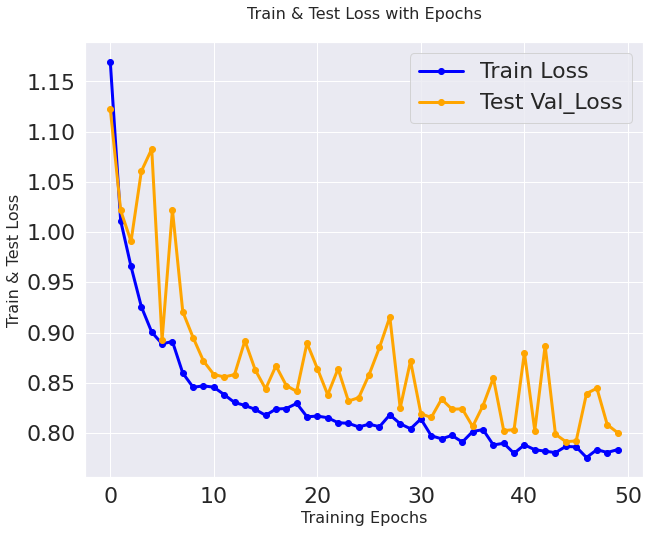

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

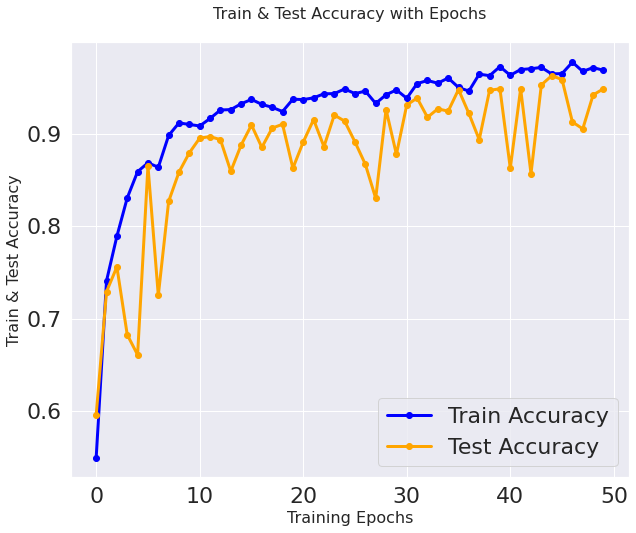

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [61]:
from tensorflow.keras.models import load_model

cnn.save('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part three(Final)/my_model_final.h5')

In [62]:
from tensorflow.keras.models import load_model
 
model = load_model('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part three(Final)/my_model_final.h5')

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [64]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 025.png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 17ms/step
[[6.4564520e-11 1.0858072e-10 2.7273435e-08 1.0000000e+00]]
[3, 2, 1, 0]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [73]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation/Barbel_Fish/Barbel_Fish 002.png', 
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 17ms/step
[[9.9942636e-01 7.1578820e-06 5.6229281e-04 4.1709491e-06]]
[0, 2, 1, 3]
Barbel_Fish : 99.94 %
Spotted_Snakehead_Fish : 0.06 %
Hilsha_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [74]:
model.save("/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part three(Final)/my_model_svm.h5")

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [118]:
y_pred = model.predict(test_set)

38/38 [==============================] - 7s 179ms/step


In [119]:
y_pred = np.argmax(y_pred,axis = 1)

In [120]:
y_pred.shape

(1200,)

In [121]:
import os
import cv2

def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
       sub_path = path +"/"+ folder

  for img in os.listdir(sub_path):
      image_path = sub_path + "/"+ img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr,size)
      data.append(img_arr)

  return data

In [122]:
test_set = '/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation'
#train_set = '/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training'

In [126]:
size = (64,64)
test = imagearray(test_set,size)
x_test = np.array(test)
x_test = x_test/255

In [124]:
x_test.shape

(300, 64, 64, 3)

In [127]:
def data_class(data_path,size,class_mode):
    datagen  = ImageDataGenerator(rescale=1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [128]:
test_class = data_class(test_set,size,"sparse")
#categorical
#sparse

Found 1200 images belonging to 4 classes.


In [130]:
y_test = test_class.classes

In [131]:
y_test.shape

(1200,)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.27      0.25       300
           1       0.27      0.25      0.26       300
           2       0.23      0.22      0.23       300
           3       0.26      0.26      0.26       300

    accuracy                           0.25      1200
   macro avg       0.25      0.25      0.25      1200
weighted avg       0.25      0.25      0.25      1200



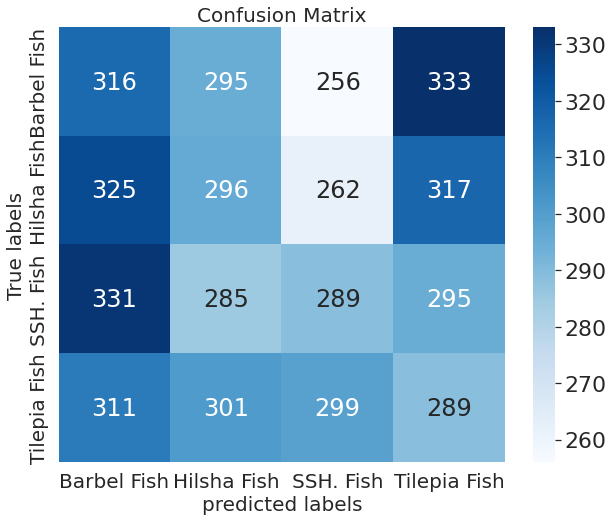

In [111]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);

In [90]:
f1_score(y_test,y_pred,average = 'macro')

0.24422123527777345

In [91]:
recall_score(y_test,y_pred,average = 'weighted')

0.24583333333333332

In [92]:
precision_score(y_test,y_pred,average = 'macro')

0.24369421608287564